# Sinusoid autoencoder trained with multiple phases

Let's provide more training examples - sinusoid with various phases.

In [3]:
%pylab inline
import keras
import numpy as np
import keras

Populating the interactive namespace from numpy and matplotlib


(50, 50)


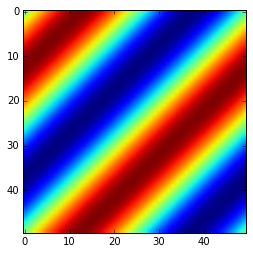

In [4]:
N = 50
# phase_step = 1 / (2 * np.pi)
t = np.arange(50)
phases = np.linspace(0, 1, N) * 2 * np.pi
x = np.array([np.sin(2 * np.pi / N * t + phi) for phi in phases])
print(x.shape)
imshow(x);

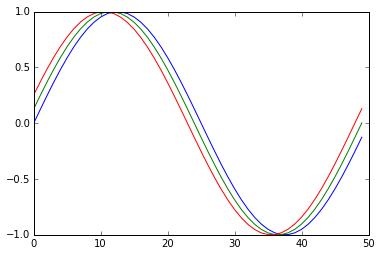

In [5]:
plot(x[0]);
plot(x[1]);
plot(x[2]);

In [6]:
from keras.models import Sequential
from keras.layers import containers
from keras.layers.core import Dense, AutoEncoder

encoder = containers.Sequential([
        Dense(25, input_dim=50),
        Dense(12)
    ])
decoder = containers.Sequential([
        Dense(25, input_dim=12),
        Dense(50)
    ])

model = Sequential()
model.add(AutoEncoder(encoder=encoder, decoder=decoder, output_reconstruction=True))

model.compile(loss='mean_squared_error', optimizer='sgd')

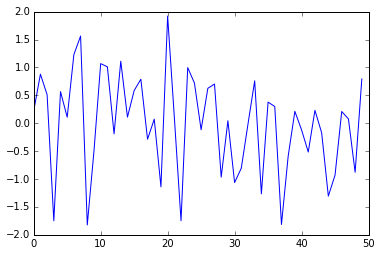

In [7]:
plot(model.predict(x)[0]);

In [8]:
from loss_history import LossHistory
loss_history = LossHistory()
model.fit(x, x, nb_epoch=1000, batch_size=50, callbacks=[loss_history])

Epoch 1/1000
50/50 [==============================] - 0s - loss: 0.7450
Epoch 2/1000
50/50 [==============================] - 0s - loss: 0.7090
Epoch 3/1000
50/50 [==============================] - 0s - loss: 0.6778
Epoch 4/1000
50/50 [==============================] - 0s - loss: 0.6507
Epoch 5/1000
50/50 [==============================] - 0s - loss: 0.6269
Epoch 6/1000
50/50 [==============================] - 0s - loss: 0.6059
Epoch 7/1000
50/50 [==============================] - 0s - loss: 0.5872
Epoch 8/1000
50/50 [==============================] - 0s - loss: 0.5704
Epoch 9/1000
50/50 [==============================] - 0s - loss: 0.5553
Epoch 10/1000
50/50 [==============================] - 0s - loss: 0.5417
Epoch 11/1000
50/50 [==============================] - 0s - loss: 0.5293
Epoch 12/1000
50/50 [==============================] - 0s - loss: 0.5179
Epoch 13/1000
50/50 [==============================] - 0s - loss: 0.5075
Epoch 14/1000
50/50 [==============================] - 0s - 

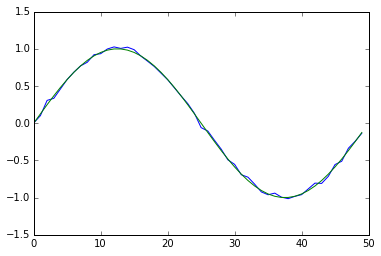

In [9]:
plot(model.predict(x)[0])
plot(x[0])

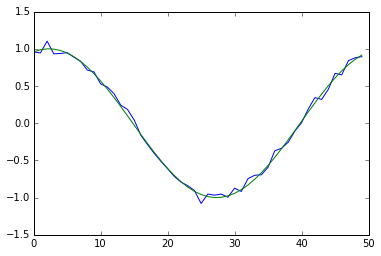

In [10]:
plot(model.predict(x)[10])
plot(x[10])

last loss: 0.0011872439874542162


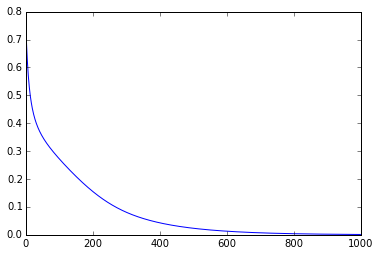

In [11]:
print('last loss:', loss_history.losses[-1])
plot(loss_history.losses);

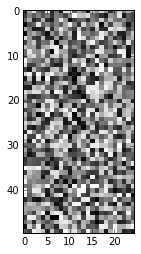

In [12]:
imshow(model.get_weights()[0], interpolation='nearest', cmap='gray');

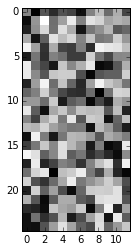

In [13]:
imshow(model.get_weights()[2], interpolation='nearest', cmap='gray');

The model should be able to handle noise-corrupted input signal.

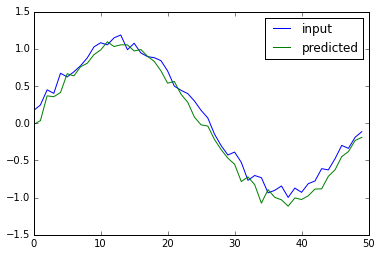

In [14]:
x_noised = x + 0.2 * np.random.random(len(x[0]))
plot(x_noised[0], label='input')
plot(model.predict(x_noised)[0], label='predicted')
legend();

This time the model should be able to handle also phase-shifted signal since it was trained such.

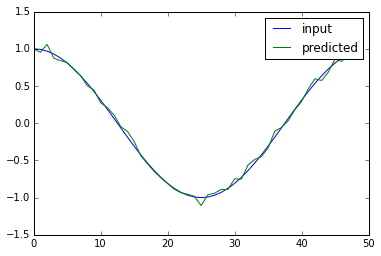

In [15]:
x_shifted = np.cos(2*np.pi/N * t.reshape(1, -1))
plot(x_shifted[0], label='input')
plot(model.predict(x_shifted)[0], label='predicted')
legend();